<a href="https://colab.research.google.com/github/engineereliab076/engineereliab076/blob/main/1_celebrity_img_classifiction(i_data_cleaning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

(1920, 1080, 3)

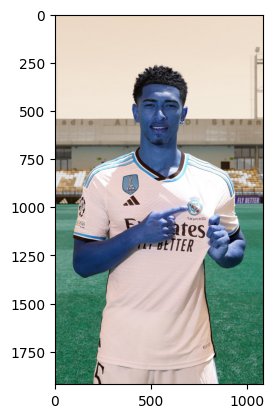

In [78]:
img = cv2.imread('/content/bellingham.jpg')
plt.imshow(img)
img.shape

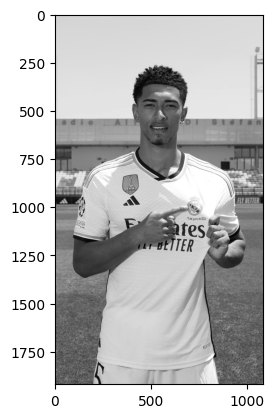

In [79]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray
gray.shape
plt.imshow(gray,cmap='gray')

In [80]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

In [81]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[400, 360, 292, 292]], dtype=int32)

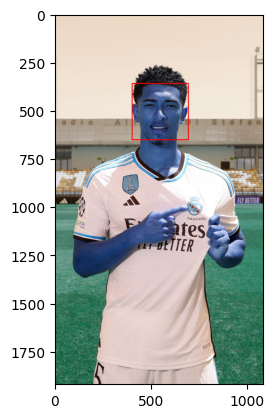

In [82]:
for (x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  plt.imshow(img)

In [83]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

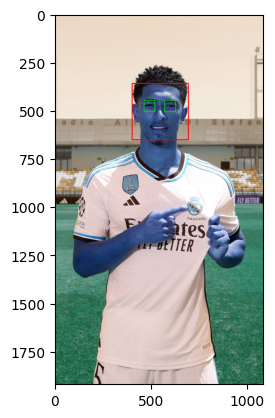

In [89]:
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

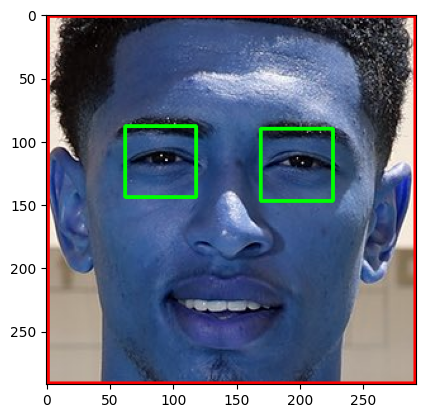

In [88]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [94]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

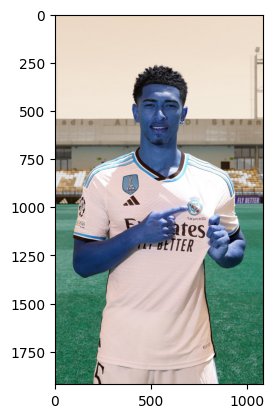

In [95]:
og_img = cv2.imread('/content/bellingham.jpg')
plt.imshow(og_img)

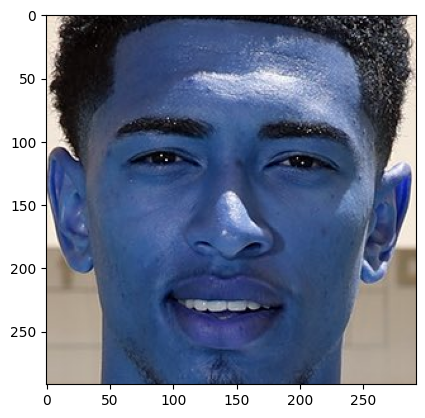

In [100]:
cropped_img = get_cropped_image_if_2_eyes('/content/bellingham.jpg')
plt.imshow(cropped_img)

In [101]:
from zipfile import ZipFile
dataset='/content/archive (1).zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [102]:
path_to_data = "/content/Sports-celebrity images"
path_to_cr_data = "/content/cropped file"

In [103]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [104]:
img_dirs

['/content/Sports-celebrity images/Ronaldo',
 '/content/Sports-celebrity images/Kane Williamson',
 '/content/Sports-celebrity images/Maria Sharapova',
 '/content/Sports-celebrity images/Kobe Bryant']

In [105]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [106]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Ronaldo
Generating cropped images in folder:  /content/cropped fileRonaldo
Kane Williamson
Generating cropped images in folder:  /content/cropped fileKane Williamson
Maria Sharapova
Generating cropped images in folder:  /content/cropped fileMaria Sharapova
Kobe Bryant
Generating cropped images in folder:  /content/cropped fileKobe Bryant
